In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [36]:
# load dataset into pandas dataframe
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
iris.head()
iris['target'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: target, dtype: int64

In [37]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

In [38]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)
df = pd.DataFrame(data = X, columns = ['col_1', 'col_2', 'col_3'])

In [39]:
df = pd.concat([df, iris[['target']]], axis=1)

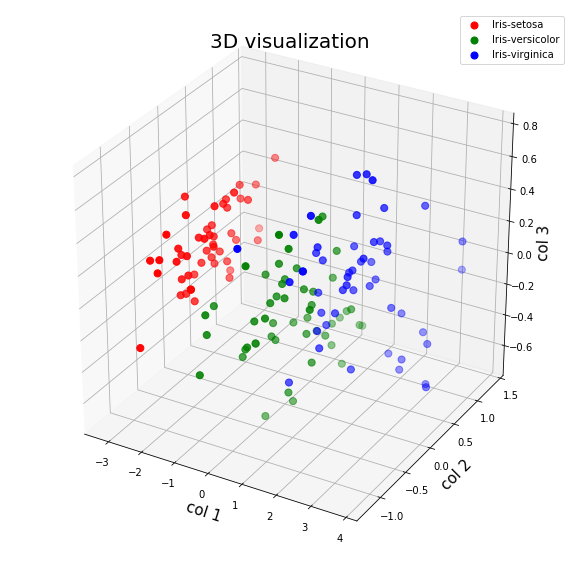

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('col 1', fontsize = 15)
ax.set_ylabel('col 2', fontsize = 15)
ax.set_zlabel('col 3', fontsize = 15)
ax.set_title('3D visualization', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    val = df['target'] == target
    ax.scatter(df.loc[val, 'col_1']
               , df.loc[val, 'col_2']
               , df.loc[val, 'col_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()